<a href="https://colab.research.google.com/github/joec99/CAM_DS_101_Portolio_Contentsv1.0/blob/main/Joe_Church_CAM_DS_C101_Demo_2_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3.4 Making predictions with linear and multiple regression models

Follow the demonstration to learn how to build a regression model in Python, calculate confidence and prediction intervals, and interpret the outputs in a business context. In this video, you will learn to:
- inspect, clean, and explore the data
- build both simple and multiple linear regression models
- interpret the results and accuracy of the model
- select between multiple different models.


In [ ]:
# Import the required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the data into a DataFrame.
ad_data = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/advertising.csv"))

# View the output.
print(ad_data.shape)
ad_data.head()

(200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## a. Data inspection

In [ ]:
# View the metadata with the info function.
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Compute the descriptive statistics.
ad_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## b. Data cleaning

In [ ]:
# Remove redundant column (Unnamed: 0).
ad_data.drop(ad_data.columns[[0]],
             axis=1,
             inplace=True)

# View output.
ad_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Check null values.
ad_data.isnull().sum()

# There are no null values in the data set, hence it is clean.

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## c. Exploratory data analysis

**Expenditure (independent variable)**

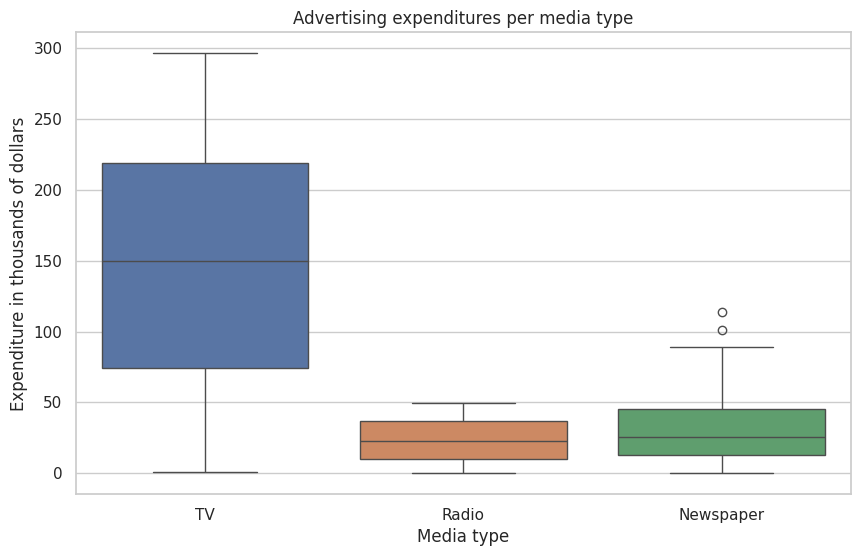

In [ ]:
# Set the style.
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=ad_data[['TV',
                                    'Radio',
                                    'Newspaper']])

# Set title and labels.
boxplot.set_title('Advertising expenditures per media type')
boxplot.set_xlabel('Media type')
boxplot.set_ylabel('Expenditure in thousands of dollars')

# Display the plot.
plt.show()

**Sales (dependent variable)**

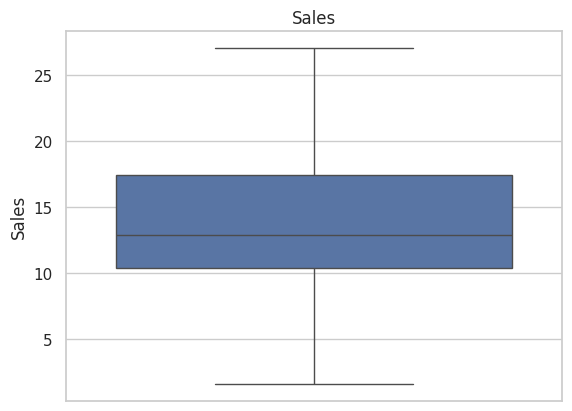

In [ ]:
# Create a boxplot.
sns.boxplot(ad_data['Sales'])

plt.title('Sales')
plt.show()

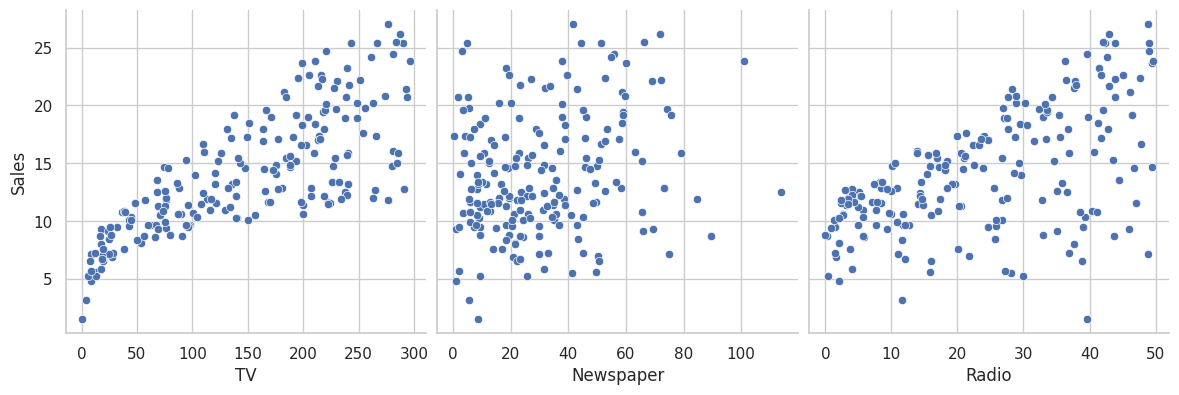

In [ ]:
# Let's see how Sales are related to other variables using scatterplots.
sns.pairplot(ad_data,
             x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales',
             height=4,
             aspect=1,
             kind='scatter')

plt.show()

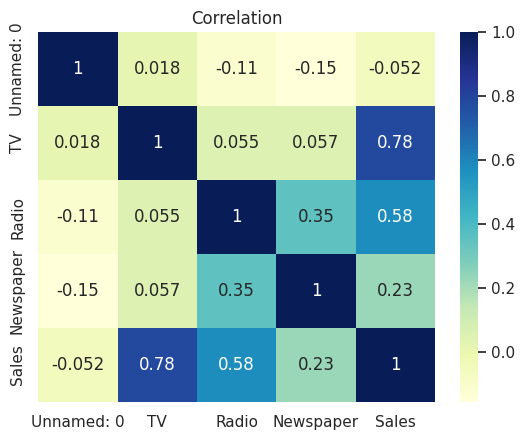

In [ ]:
# Let's see the correlation between different variables. - pearson correl!
sns.heatmap(ad_data.corr(),
            cmap="YlGnBu",
            annot = True)

plt.title('Correlation')
plt.show()

## d. Simple linear regression



### i. Model building

In [ ]:
# Specify the variables.
X = ad_data['TV']
y = ad_data['Sales']

In [ ]:
import statsmodels.api as sm

# Add a constant to get an intercept.
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'.
lr = sm.OLS(y, X_sm).fit()

In [ ]:
# Print the parameters (i.e. the intercept and the slope of the regression line fitted).
lr.params

const    7.032594
TV       0.047537
dtype: float64

In [ ]:
# Perform a summary operation lists out all the different parameters of the regression line fitted.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           1.47e-42
Time:                        14:21:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0


For this model, the equation is given as:

$ Sales = 7.03 + 0.048 \times TV $

Importantly, note the p-values of each coefficient, as well as the coefficient interval. Although we have observed a value of 0.048 for the TV regression coefficient, this might not be the true value. Had we observed slightly different data, we might have encountered a different coefficient value. As such, the confidence interval, gives you an interval in which you should be 95% confident that the true regression coefficient is found. In our case, you can expect the coefficient for TV to be between 0.042 and 0.053.

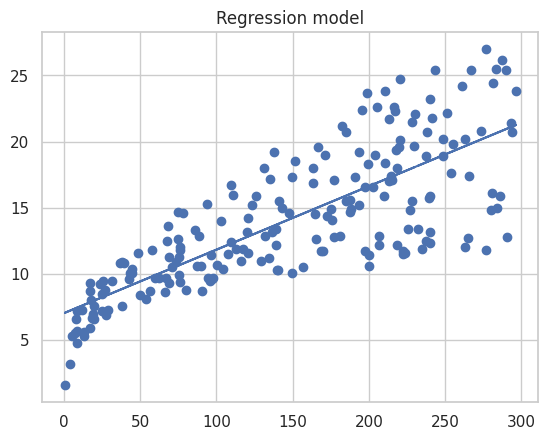

In [ ]:
# Visualise the regression model.
plt.scatter(X, y)
plt.plot(X, 7.03 + 0.048*X)

plt.title('Regression model')
plt.show()

### ii. Model evaluation

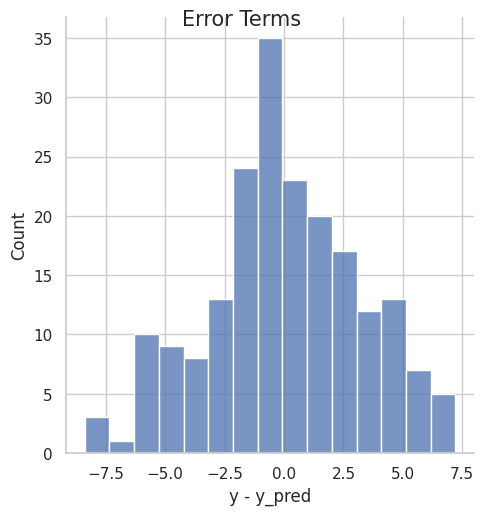

In [ ]:
# Check whether the error terms are normally distributed.
y_pred = lr.predict(X_sm)
res = (y - y_pred)

# Create a visualisation.
g = sns.displot(res, bins=15)
g.fig.suptitle('Error Terms', fontsize=15)
g.set_axis_labels('y - y_pred', 'Count')
plt.show()

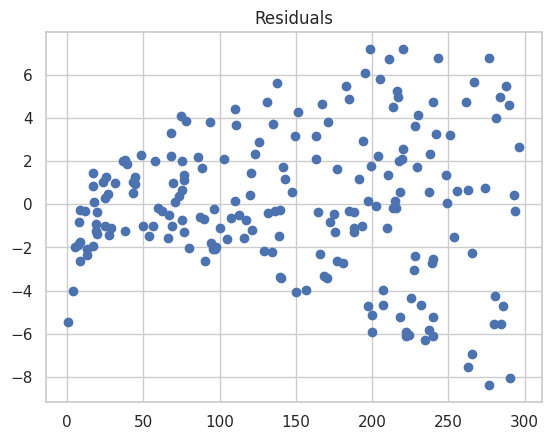

In [ ]:
# Is there any pattern visible in the residuals?
plt.scatter(X, res)

plt.title('Residuals')
plt.show()

In [ ]:
# Imprt required libraries.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Return the mean squared error; we'll take the square root.
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546883

In [ ]:
# Imprt the required libraries.
from sklearn.metrics import r2_score

r_squared = r2_score(y, y_pred)

# View the output.
r_squared

0.6118750508500712

Looking at the $R^2$ value, we can interpret it as the model explaining 61.2% of the variance in Sales.

## e. Multiple linear regression

If you refer back to the exploratory data analysis, you can see that Radio and Sales have a positive correlation of 0.58, which, although not as high as the TV variable, it is still a sizeable amount. Similarly the 0.23 correlation between Newsaper and Sales could also be one worth modelling. As such, we will now construct a second model, with three predictors (TV , Radio, and Newspaper), evaluate the model, and compare it against the first one.


### i. Model building

In [ ]:
# Specify the variables.
X = ad_data.drop('Sales', axis=1)
y = ad_data['Sales']

# Add a constant to get an intercept.
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'.
lr = sm.OLS(y, X_sm).fit()

# Perform a summary operation that lists out all the different parameters of the regression line fitted.
print(lr.summary())

# Print the p-values for each coefficient
print("\nP-values of the coefficients:")
print(lr.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           3.94e-95
Time:                        15:56:33   Log-Likelihood:                -386.14
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.394      7.623      0.0


For this model, the equation is given as:

$ Sales = 2.939 + 0.046 \times TV + 0.19 \times Radio - 0.001 \times Newspaper$

Importantly, if you look at the p-value and the confidence interval for the Newspaper coefficient, you can notice it appears to be non-significant. The Confidence Interval (CI) includes 0, which means that the Newspaper variable could potentially have no actual effect on Sales, although in our model we predict a -0.001 effect. It might be a good idea to explore removing this variable from our model.

Furthermore, since this model now includes 3 predictors, we can no longer easily visualise it. We would need a 4D plot to be able to observe every predictor and the outcome variable.

### ii. Model evaluation

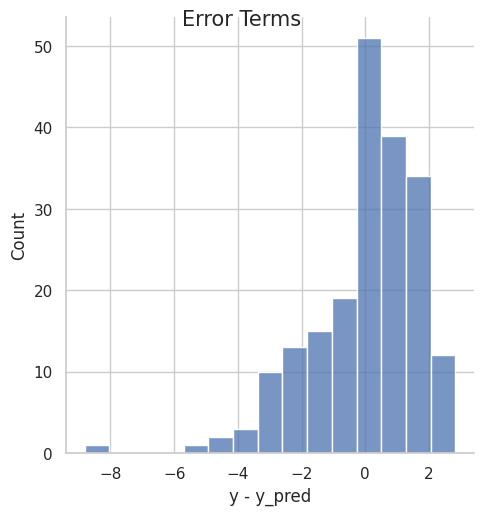

In [ ]:
# Check whether the error terms are normally distributed.
y_pred = lr.predict(X_sm)
res = (y - y_pred)

# Create a visualisation.
g = sns.displot(res, bins=15)
g.fig.suptitle('Error Terms', fontsize=15)
g.set_axis_labels('y - y_pred', 'Count')
plt.show()

In [ ]:
# Return the mean squared error; we'll take a square root.
np.sqrt(mean_squared_error(y, y_pred))

1.6682438365932681

In [ ]:
# Determine the R-squared value (test data set).
r_squared = r2_score(y, y_pred)

# View the output.
r_squared

0.8972508370448042

## f. Model selection

If you recall in the previous section, the Newspaper variable did not seem to be as important as Radio and TV. Thus, it might be a good idea to drop it. This philosophy is based on Albert Einstein's quote: 'A model should be as simple as it can be, but no simpler'. The model using exclusively TV as a *predictor* appears to be too simple, whereas the one using all variables seems not simple enough. An idea could be exploring a model with TV and Radio as the predictors.

In [ ]:
# Specify the variables.
X = ad_data.drop(['Sales', 'Newspaper'], axis=1)
y = ad_data['Sales']

# Add a constant to get an intercept.
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'.
lr = sm.OLS(y, X_sm).fit()

# Print the parameters (i.e. the intercept and the slope of the regression line fitted).
lr.params

# Perform a summary operation lists out all the different parameters of the regression line fitted.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.4
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           1.55e-96
Time:                        14:30:08   Log-Likelihood:                -386.16
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9779      0.371      8.023      0.0

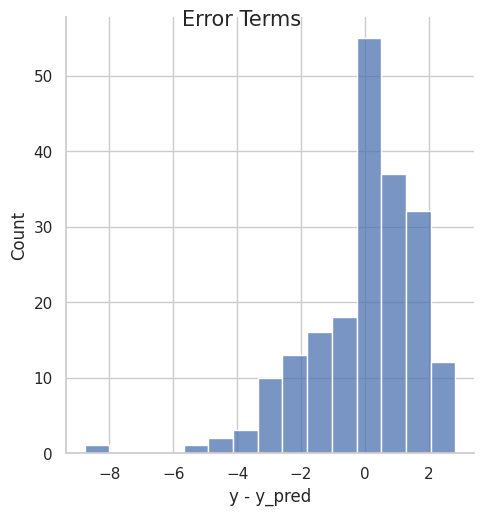

In [ ]:
# Check whether the error terms are normally distributed.
y_pred = lr.predict(X_sm)
res = (y - y_pred)

# Create a visualisation.
g = sns.displot(res, bins=15)
g.fig.suptitle('Error Terms', fontsize=15)
g.set_axis_labels('y - y_pred', 'Count')
plt.show()

In [ ]:
# Predict the y values corresponding to X_test_sm.
y_pred = lr.predict(X_sm)

# Return the mean squared error; we'll take a square root.
np.sqrt(mean_squared_error(y, y_pred))

1.6684317486152123

In [ ]:
# Determine the R-squared value (test data set).
r_squared = r2_score(y, y_pred)

# View the output.
r_squared

0.8972276882820611

The MSE and $R^2$ values are identical for Model 2 and Model 3, showing that, according to these measures, removing the Newspaper variable does not affect the explanatory or predictive capabilities of the model. As such, you might consider going with the simpler model.

# Key information
The demonstration illustrated that the regression models indicated a strong positive linear relationship between TV and Sales. We can fairly confident make predictions based on this model.

## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.